# Homework part I

The first problem set contains basic tasks in pytorch.

__Note:__ Instead of doing this part of homework, you can prove your skills otherwise:
* A commit to pytorch or pytorch-based repos will do;
* Fully implemented seminar assignment in tensorflow or theano will do;
* Your own project in pytorch that is developed to a state in which a normal human can understand and appreciate what it does.

In [21]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision

print(torch.__version__)

1.0.0


### Task I - tensormancy

![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


__1.1 the cannabola__ 
[_disclaimer_](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

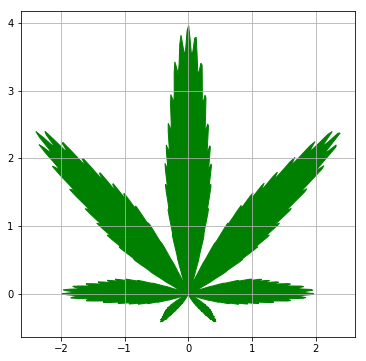

In [4]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = (
    (1 + 0.9 * torch.cos(8 * theta)) *
    (1 + 0.1 * torch.cos(24 * theta)) *
    (0.9 + 0.05 * torch.cos(200 * theta)) *
    (1 + torch.sin(theta))
)

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho * torch.cos(theta)
y = rho * torch.sin(theta)


plt.figure(figsize=[6,6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

### Task II: the game of life

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure pytorch_. 

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU! __ Indeed, what could be a better use of your gpu than simulating game of life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the url above out of sloth, here's the game of life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference numpy implementation that you must convert to pytorch.
_[numpy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format. 


In [5]:
from scipy.signal import correlate2d as conv2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1,1,1],
                        [1,0,1],
                        [1,1,1]])
    
    N = conv2d(Z, filters, mode='same')
    
    # Apply rules
    birth = (N==3) & (Z==0)
    survive = ((N==2) | (N==3)) & (Z==1)
    
    Z[:] = birth | survive
    return Z

In [8]:
from torch.nn.functional import conv2d as thconv2d


def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.
    
    You can opt to create new tensor or change Z inplace.
    """
    filters = np.array([[1,1,1],
                        [1,0,1],
                        [1,1,1]]).reshape(1, 1, 3, 3)
    filters = torch.FloatTensor(filters)
    N = thconv2d(Z, filters, padding=1)
    
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)
    
    Z[:] = birth | survive
    
    return Z

In [10]:
#initial frame
Z_numpy = np.random.choice([0,1], p=(0.5,0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)[None, None, :, :]

#your debug polygon :)
Z_new = torch_update(Z.clone())

#tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), "your pytorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


<IPython.core.display.Javascript object>


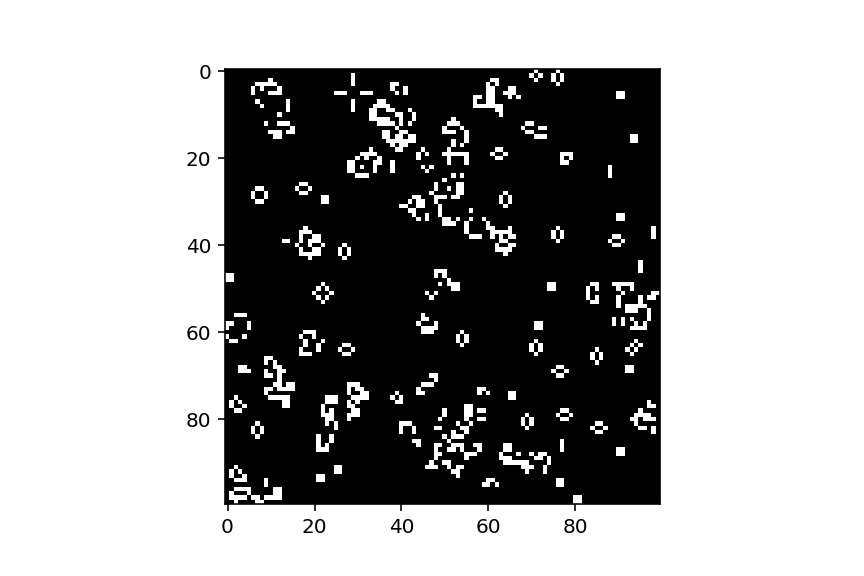

In [13]:
%matplotlib notebook
plt.ion()

# initialize game field
Z = np.random.choice([0,1], size=(1, 1, 100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # update
    Z = torch_update(Z)
    
    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy()[0, 0], cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


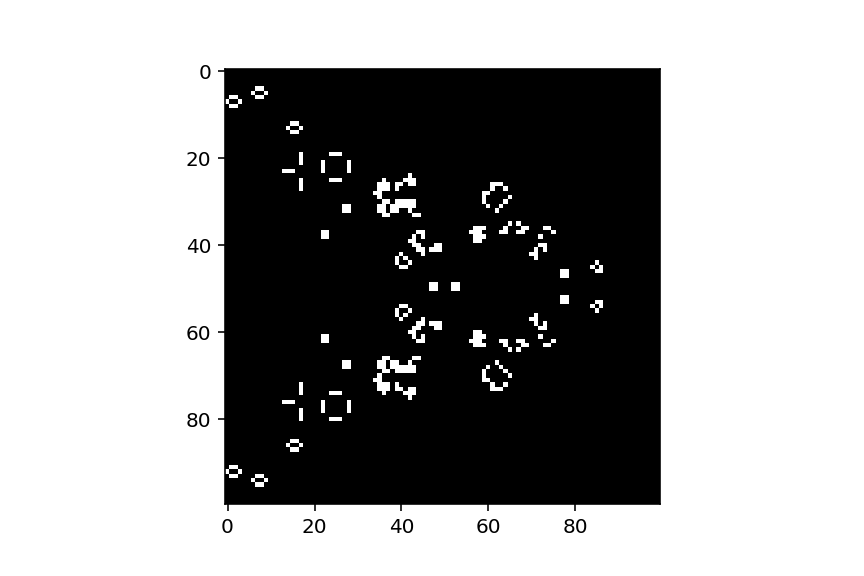

In [15]:
#Some fun setups for your amusement

#parallel stripes
Z = (np.arange(100) % 2 + np.zeros([100,100]))
#with a small imperfection
Z[48:52,50]=1

Z = torch.from_numpy(Z).type(torch.FloatTensor)[None, None, :, :]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy()[0, 0],cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE)

```

```

```

```

```

```

```

```

```

```



### Task III: Going deeper
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>
Your third trial is to build your first neural network [almost] from scratch and pure torch.

This time you will solve yet another digit recognition problem, but at a greater scale
* 10 different letters
* 20k samples

We want you to build a network that reaches at least 80% accuracy and has at least 2 linear layers in it. Naturally, it should be nonlinear to beat logistic regression. You can implement it with either 


With 10 classes you will need to use __Softmax__ at the top instead of sigmoid and train for __categorical crossentropy__  (see [here](https://www.kaggle.com/wiki/LogLoss)).  Write your own loss or use `torch.nn.functional.nll_loss`. Just make sure you understand what it accepts as an input.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) neural network should already give you an edge over logistic regression.


__[bonus kudos]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILERS!__
At the end of the notebook you will find a few tips and frequent errors. 
If you feel confident enogh, just start coding right away and get there ~~if~~ once you need to untangle yourself. 



In [86]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 1, 28, 28]), X_test.reshape([-1, 1, 28, 28])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


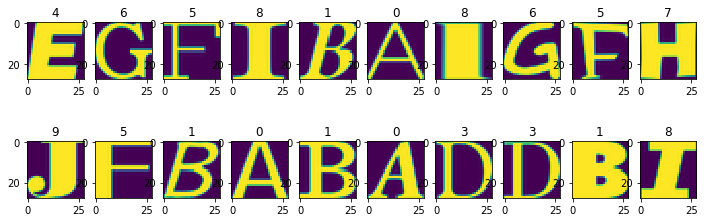

In [87]:
%matplotlib inline
plt.figure(figsize=[12,4])
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

In [88]:
batch_size = 50

def batch_gen(X, y):
    indices = np.random.permutation(np.arange(len(X)))
    for i in range(0, len(indices) // batch_size):
        ii = indices[i * batch_size: (i + 1) * batch_size]
        yield X[ii], y[ii]
        
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [89]:
def compute_loss(X_batch, y_batch):
    X_batch = Variable(torch.FloatTensor(X_batch))
    y_batch = Variable(torch.LongTensor(y_batch))
    logits = model(X_batch)
    return F.cross_entropy(logits, y_batch).mean()

In [90]:
#< a whole lot of your code > 
model = nn.Sequential()

model.add_module('cv1', nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3))
model.add_module('cv1_bn', nn.BatchNorm2d(4))
model.add_module('cv1_mp', nn.MaxPool2d(2, stride=2))
model.add_module('cv1_relu', nn.ReLU())

model.add_module('cv2', nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3))
model.add_module('cv2_bn', nn.BatchNorm2d(8))
model.add_module('cv2_mp', nn.MaxPool2d(2, stride=2))
model.add_module('cv2_rlu', nn.ReLU())

model.add_module('fl', Flatten())

model.add_module('ds1', nn.Linear(200, 64))
model.add_module('ds1_do', nn.Dropout(0.40))
model.add_module('ds1_relu', nn.ReLU())

model.add_module('ds2_logits', nn.Linear(64, 10))

from torchsummary import summary

summary(model, (1, 28, 28), 1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [1, 4, 26, 26]              40
       BatchNorm2d-2             [1, 4, 26, 26]               8
         MaxPool2d-3             [1, 4, 13, 13]               0
              ReLU-4             [1, 4, 13, 13]               0
            Conv2d-5             [1, 8, 11, 11]             296
       BatchNorm2d-6             [1, 8, 11, 11]              16
         MaxPool2d-7               [1, 8, 5, 5]               0
              ReLU-8               [1, 8, 5, 5]               0
           Flatten-9                   [1, 200]               0
           Linear-10                    [1, 64]          12,864
          Dropout-11                    [1, 64]               0
             ReLU-12                    [1, 64]               0
           Linear-13                    [1, 10]             650
Total params: 13,874
Trainable params: 

In [91]:
opt = torch.optim.Adam(model.parameters(), weight_decay=1e-5)

train_loss = []
val_accuracy = []

In [99]:
import numpy as np

opt = torch.optim.SGD(model.parameters(), lr=0.01)

train_loss = []
val_accuracy = []

num_epochs = 50 # total amount of full passes over training data

import time

for epoch in range(num_epochs):
    start_time = time.time()
    model.train(True) # enable dropout / batch_norm training behavior
    for (X_batch, y_batch) in batch_gen(X_train, y_train):
        # train on batch
        loss = compute_loss(X_batch, y_batch)
        loss.backward()
        opt.step()
        opt.zero_grad()
        train_loss.append(loss.cpu().data.numpy())
    
    model.train(False) # disable dropout / use averages for batch_norm
    for X_batch, y_batch in batch_gen(X_val, y_val):
        logits = model(Variable(torch.FloatTensor(X_batch)))
        y_pred = logits.max(1)[1].data
        val_accuracy.append(np.mean( (y_batch == y_pred.numpy())))

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss (in-iteration): \t{:.6f}".format(
        np.mean(train_loss[-len(X_train) // batch_size :])))
    print("  validation accuracy: \t\t\t{:.2f} %".format(
        np.mean(val_accuracy[-len(X_val) // batch_size :]) * 100))

Epoch 1 of 50 took 3.058s
  training loss (in-iteration): 	0.763198
  validation accuracy: 			81.57 %
Epoch 2 of 50 took 2.911s
  training loss (in-iteration): 	0.701983
  validation accuracy: 			83.72 %
Epoch 3 of 50 took 2.966s
  training loss (in-iteration): 	0.640574
  validation accuracy: 			86.00 %
Epoch 4 of 50 took 2.845s
  training loss (in-iteration): 	0.610847
  validation accuracy: 			86.69 %
Epoch 5 of 50 took 3.178s
  training loss (in-iteration): 	0.556245
  validation accuracy: 			87.59 %
Epoch 6 of 50 took 2.848s
  training loss (in-iteration): 	0.529660
  validation accuracy: 			87.79 %
Epoch 7 of 50 took 3.098s
  training loss (in-iteration): 	0.503221
  validation accuracy: 			87.66 %
Epoch 8 of 50 took 2.888s
  training loss (in-iteration): 	0.475255
  validation accuracy: 			88.34 %
Epoch 9 of 50 took 2.866s
  training loss (in-iteration): 	0.464340
  validation accuracy: 			88.62 %
Epoch 10 of 50 took 2.899s
  training loss (in-iteration): 	0.447108
  validation 

KeyboardInterrupt: 

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


# SPOILERS!

Recommended pipeline

* Adapt logistic regression from week2 seminar assignment to classify one letter against others (e.g. A vs the rest)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - softmax (exp over sum of exps) can implemented manually or as nn.Softmax (layer) F.softmax (function)
  - probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - you can also try momentum/rmsprop/adawhatever
    - in which case sample should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just output layer :)
  - __Do not initialize weights with zeros__ (due to symmetry effects). A gaussian noize with small variance will do.
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal casae this totals to 2 .dot's, 1 softmax and 1 sigmoid
  - __make sure this neural network works better than logistic regression__
  
* Now's the time to try improving the network. Consider layers (size, neuron count),  nonlinearities, optimization methods, initialization - whatever you want, but please avoid convolutions for now.
  
* If anything seems wrong, try going through one step of training and printing everything you compute.
* If you see NaNs midway through optimization, you can estimate log P(y|x) as via F.log_softmax(layer_before_softmax)

